# Implement Clustering Metrics Functions

In [1]:
def correctness(i, j, y_test, y_pred):
    if y_test[i] == y_test[j] and y_pred[i] == y_pred[j]:
        return 1
    else:
        return 0
    
def precision_bcubed(y_test, y_pred):
    prec = []
    for i in range(len(y_pred)):
        same_pred_cluster = np.reshape(np.where(y_pred == y_pred[i]), -1)
        correctness_sum = []
        for oj in same_pred_cluster:
            if oj == i:
                continue
            else:
                correctness_sum.append(correctness(i, oj, y_test, y_pred))
                
        prec.append(np.sum(correctness_sum)/(len(same_pred_cluster) - 1))
    
    return np.round(np.sum(prec)/len(y_pred), 3)

def recall_bcubed(y_test, y_pred):
    prec = []
    for i in range(len(y_test)):
        same_test_cluster = np.reshape(np.where(y_test == y_test[i]), -1)
        correctness_sum = []
        for oj in same_test_cluster:
            if oj == i:
                continue
            else:
                correctness_sum.append(correctness(i, oj, y_test, y_pred))
                
        prec.append(np.sum(correctness_sum)/(len(same_test_cluster) - 1))
    
    return np.round(np.sum(prec)/len(y_test), 3)

def f1_bcubed(y_test, y_pred):
    prec = precision_bcubed(y_test, y_pred)
    rec = recall_bcubed(y_test, y_pred)
    return np.round(2 * (prec * rec)/(prec + rec), 3)

In [2]:
def silhouette_one(o, x, y_pred):

    same_cluster = x[y_pred == y_pred[o]]
    other_clusters = np.delete(np.unique(y_pred), y_pred[o])
    a_dist = []
    b_dist = []

    for i in same_cluster:
        if np.array_equal(i, x[o]):
            continue
        else:
            a_dist.append(np.linalg.norm(x[o] - i))
    a_dist = np.mean(a_dist)

    for j in other_clusters:
        other_cluster = x[y_pred == j]
        b_dist.append(np.mean(np.linalg.norm(other_cluster - x[o], axis = 1)))
        
    b_dist = np.min(b_dist)
    return (b_dist - a_dist)/max(a_dist, b_dist) 

def silhouette(x, y_pred):
    silh_score = []
    noize = np.where(y_pred == -1)
    y_pred = np.delete(y_pred, noize)
    x = np.delete(x, noize, axis = 0)
    
    for o in range(y_pred.shape[0]):
        same_cluster = x[y_pred == y_pred[o]]
        if len(same_cluster) == 1:
            continue
        else:
            other_clusters = np.delete(np.unique(y_pred), y_pred[o])
            a_dist = []
            b_dist = []

            for i in same_cluster:
                if np.array_equal(i, x[o]):
                    continue
                else:
                    a_dist.append(np.linalg.norm(x[o] - i))
            a_dist = np.mean(a_dist)

            for j in other_clusters:
                other_cluster = x[y_pred == j]
                b_dist.append(np.mean(np.linalg.norm(other_cluster - x[o], axis = 1)))

            b_dist = np.min(b_dist)
        
        silh_score.append((b_dist - a_dist)/max(a_dist, b_dist) )
    return np.round(np.mean(silh_score),3)

In [26]:
silhouette(X_blobs, y_blobs)

0.629

# Experimenting

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles

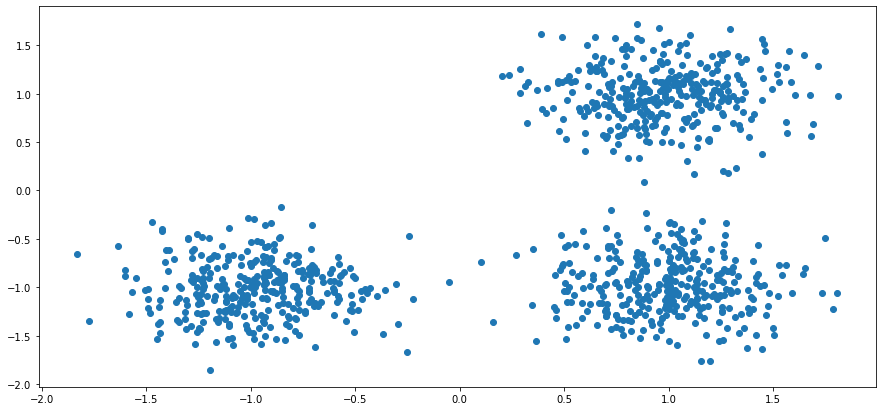

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=centers, cluster_std=0.3,
                            random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show()

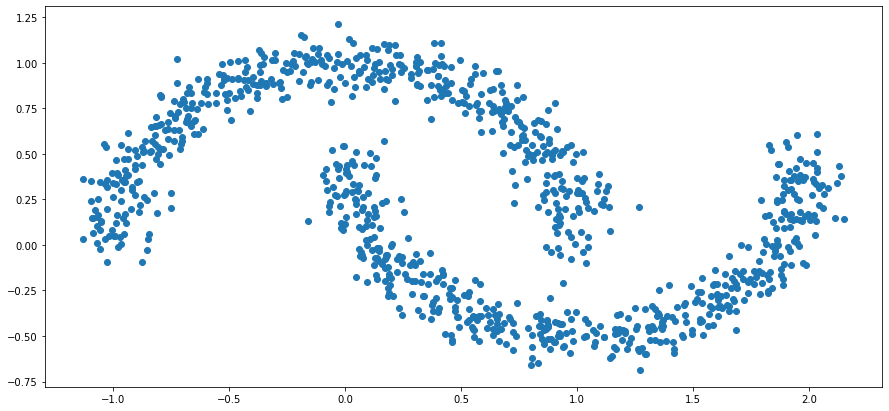

In [6]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

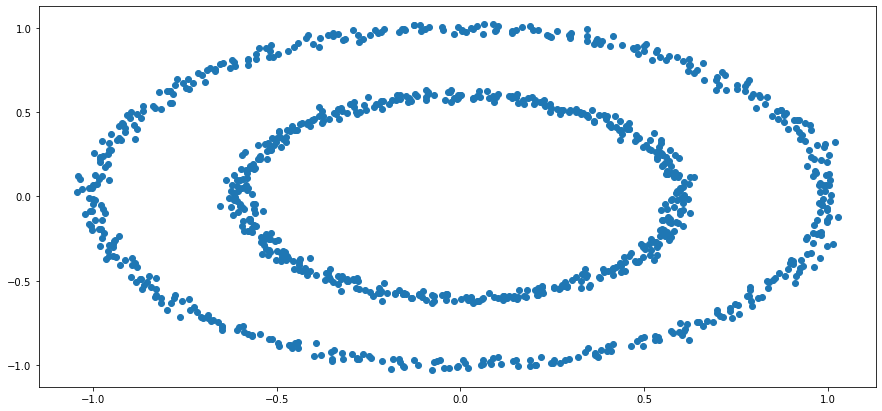

In [7]:
X_circles, y_circles = make_circles(n_samples=1000, noise=0.02, factor=0.6, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_circles[:,0], X_circles[:,1])
plt.show()

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn import mixture
from sklearn import metrics

In [9]:
# Apply all this algorithms to 3 datasets above, plot the results
# Apply your implemented metrics on your predictions
# Check if the better result by plot brings the better score
# Try to change params during dataset creation to see the results (e.g., increase noise)

In [10]:
# applying these 5 approaches to get some initial info between clusterization quality <-> scores

K-means scores
bcubed precision: 1.0 recall: 1.0 f1 score: 1.0
my silhouette score: 0.726 sklearn's silhouette score: 0.7263165596862805 

Agglomerative Clustering scores
bcubed precision: 0.994 recall: 0.994 f1 score: 0.994
my silhouette score: 0.725 sklearn's silhouette score: 0.7247027646563535 

DBSCAN scores
bcubed precision: 0.998 recall: 0.996 f1 score: 0.997
my silhouette score: 0.727 sklearn's silhouette score: 0.6552630295460992 

Spectral Clustering
bcubed precision: 1.0 recall: 1.0 f1 score: 1.0
my silhouette score: 0.726 sklearn's silhouette score: 0.7263165596862805 

GMM
bcubed precision: 1.0 recall: 1.0 f1 score: 1.0
my silhouette score: 0.726 sklearn's silhouette score: 0.7263165596862805


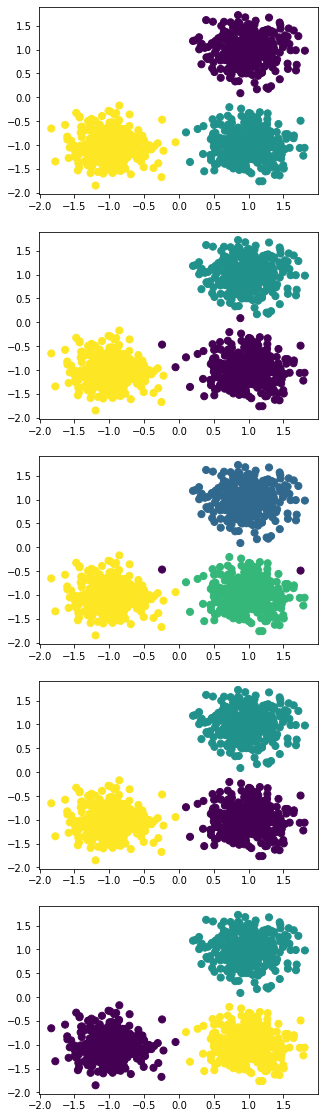

In [11]:
# K-means
kmeans = KMeans(n_clusters=3, copy_x=True, init='random')
kmeans.fit(X_blobs)
y_kmeans = kmeans.predict(X_blobs)

# Agglomerative Clustering
agl_clus = AgglomerativeClustering(n_clusters=3).fit(X_blobs)
y_agl_clus = agl_clus.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.3).fit(X_blobs)
y_dbscan = dbscan.labels_

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3).fit(X_blobs)
y_specclus = spectral_clustering.labels_

# GMM
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X_blobs)
y_gmm= gmm.predict(X_blobs)

####################
print("K-means scores")
print("bcubed precision:", precision_bcubed(y_blobs, y_kmeans), "recall:", recall_bcubed(y_blobs, y_kmeans), "f1 score:", f1_bcubed(y_blobs, y_kmeans))
print("my silhouette score:", silhouette(X_blobs, y_kmeans), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_kmeans), "\n")

print("Agglomerative Clustering scores")
print("bcubed precision:", precision_bcubed(y_blobs, y_agl_clus), "recall:", recall_bcubed(y_blobs, y_agl_clus), "f1 score:", f1_bcubed(y_blobs, y_agl_clus))
print("my silhouette score:", silhouette(X_blobs, y_agl_clus), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_agl_clus), "\n")

print("DBSCAN scores")
print("bcubed precision:", precision_bcubed(y_blobs, y_dbscan), "recall:", recall_bcubed(y_blobs, y_dbscan), "f1 score:", f1_bcubed(y_blobs, y_dbscan))
print("my silhouette score:", silhouette(X_blobs, y_dbscan), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_dbscan), "\n")

print("Spectral Clustering")
print("bcubed precision:", precision_bcubed(y_blobs, y_specclus), "recall:", recall_bcubed(y_blobs, y_specclus), "f1 score:", f1_bcubed(y_blobs, y_specclus))
print("my silhouette score:", silhouette(X_blobs, y_specclus), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_specclus), "\n")

print("GMM")
print("bcubed precision:", precision_bcubed(y_blobs, y_gmm), "recall:", recall_bcubed(y_blobs, y_gmm), "f1 score:", f1_bcubed(y_blobs, y_gmm))
print("my silhouette score:", silhouette(X_blobs, y_gmm), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_gmm))

####################
fig, axs = plt.subplots (5, 1)
fig.set_figwidth (5)
fig.set_figheight (20)

axs[0].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_kmeans, s = 50, cmap = 'viridis')
axs[1].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_agl_clus, s = 50, cmap = 'viridis')
axs[2].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_dbscan, s = 50, cmap = 'viridis')
axs[3].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_specclus, s = 50, cmap = 'viridis')
axs[4].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_gmm, s = 50, cmap = 'viridis')

In [12]:
# all the algorithms succeeded in clustering in this case, scores are ~the same, dbscans's are a bit lower as 
# based on it's specifications it is leaving out in cluster with labels -1 the "outlayers"

# there is some divergence between my silhouette and sklearn's for dbscan (here and further).
# probably, sklearn's sihouette is ignoring 'noize' points, as, when I'm also ignoring these points 
# I'm getting moreless the same silhouettes (this is only for dbscan), while if not - scores are very different
# hereafter I'm also ignoring noize, which probably is not very good <- once more, only the case of dbscan. 
# for other algorithms my and sklearns silhouette scores are always the same.
# for dbscan if no noize is available - my and sklearns silhouettes cores are also the same

In [13]:
# MOONS

K-means scores
bcubed precision: 0.626 recall: 0.626 f1 score: 0.626
my silhouette score: 0.487 sklearn's silhouette score: 0.4868730269727036 

Agglomerative Clustering scores
bcubed precision: 0.998 recall: 0.131 f1 score: 0.232
my silhouette score: 0.424 sklearn's silhouette score: 0.42355922409797553 

DBSCAN scores
bcubed precision: 0.996 recall: 0.976 f1 score: 0.986
my silhouette score: 0.335 sklearn's silhouette score: 0.21916485084303713 

Spectral Clustering
bcubed precision: 0.755 recall: 0.202 f1 score: 0.319
my silhouette score: 0.294 sklearn's silhouette score: 0.2940532391044394 

GMM
bcubed precision: 1.0 recall: 0.13 f1 score: 0.23
my silhouette score: 0.457 sklearn's silhouette score: 0.45720547317042226


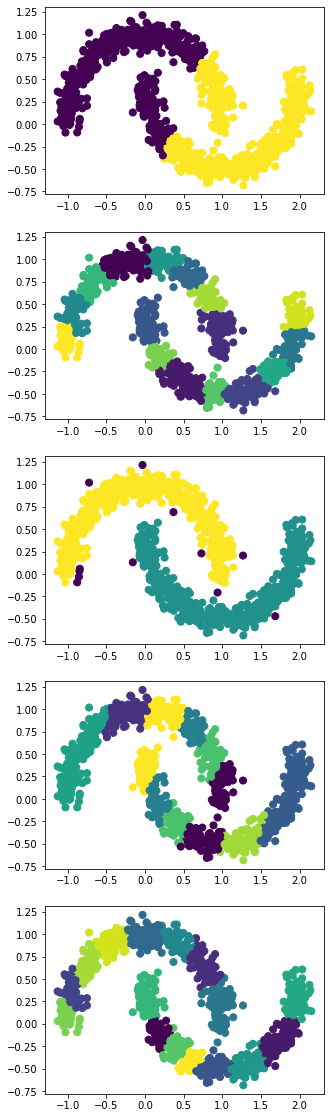

In [14]:
# K-means
kmeans = KMeans(n_clusters=2, copy_x=True, init='random')
kmeans.fit(X_moons)
y_kmeans = kmeans.predict(X_moons)

# Agglomerative Clustering
agl_clus = AgglomerativeClustering(n_clusters=None,distance_threshold=2).fit(X_moons)
y_agl_clus = agl_clus.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.1).fit(X_moons)
y_dbscan = dbscan.labels_

# Spectral Clustering
spectral_clustering = SpectralClustering(n_components=2).fit(X_moons)
y_specclus = spectral_clustering.labels_

# GMM
gmm = mixture.GaussianMixture(n_components=16)
gmm.fit(X_moons)
y_gmm= gmm.predict(X_moons)

#####################
print("K-means scores")
print("bcubed precision:", precision_bcubed(y_moons, y_kmeans), "recall:", recall_bcubed(y_moons, y_kmeans), "f1 score:", f1_bcubed(y_moons, y_kmeans))
print("my silhouette score:", silhouette(X_moons, y_kmeans), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_kmeans), "\n")

print("Agglomerative Clustering scores")
print("bcubed precision:", precision_bcubed(y_moons, y_agl_clus), "recall:", recall_bcubed(y_moons, y_agl_clus), "f1 score:", f1_bcubed(y_moons, y_agl_clus))
print("my silhouette score:", silhouette(X_moons, y_agl_clus), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_agl_clus), "\n")

print("DBSCAN scores")
print("bcubed precision:", precision_bcubed(y_moons, y_dbscan), "recall:", recall_bcubed(y_moons, y_dbscan), "f1 score:", f1_bcubed(y_moons, y_dbscan))
print("my silhouette score:", silhouette(X_moons, y_dbscan), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_dbscan), "\n")

print("Spectral Clustering")
print("bcubed precision:", precision_bcubed(y_moons, y_specclus), "recall:", recall_bcubed(y_moons, y_specclus), "f1 score:", f1_bcubed(y_moons, y_specclus))
print("my silhouette score:", silhouette(X_moons, y_specclus), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_specclus), "\n")

print("GMM")
print("bcubed precision:", precision_bcubed(y_moons, y_gmm), "recall:", recall_bcubed(y_moons, y_gmm), "f1 score:", f1_bcubed(y_moons, y_gmm))
print("my silhouette score:", silhouette(X_moons, y_gmm), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_gmm))


############
fig, axs = plt.subplots (5, 1)
fig.set_figwidth (5)
fig.set_figheight (20)

axs[0].scatter(X_moons[:, 0], X_moons[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c = y_agl_clus, s = 50, cmap = 'viridis')
axs[2].scatter(X_moons[:, 0], X_moons[:, 1], c = y_dbscan, s = 50, cmap = 'viridis')
axs[3].scatter(X_moons[:, 0], X_moons[:, 1], c = y_specclus, s = 50, cmap = 'viridis')
axs[4].scatter(X_moons[:, 0], X_moons[:, 1], c = y_gmm, s = 50, cmap = 'viridis')

In [15]:
# CIRCLES

K-means scores
bcubed precision: 0.499 recall: 0.499 f1 score: 0.499
my silhouette score: 0.374 sklearn's silhouette score: 0.37386204429791214 

Agglomerative Clustering scores
bcubed precision: 1.0 recall: 0.096 f1 score: 0.175
my silhouette score: 0.468 sklearn's silhouette score: 0.46815583941199496 

DBSCAN scores
bcubed precision: 1.0 recall: 1.0 f1 score: 1.0
my silhouette score: 0.077 sklearn's silhouette score: 0.0771067040097186 

Spectral Clustering
bcubed precision: 0.499 recall: 0.499 f1 score: 0.499
my silhouette score: 0.374 sklearn's silhouette score: 0.37381247255535505 

GMM
bcubed precision: 1.0 recall: 0.089 f1 score: 0.163
my silhouette score: 0.463 sklearn's silhouette score: 0.4631404366647771


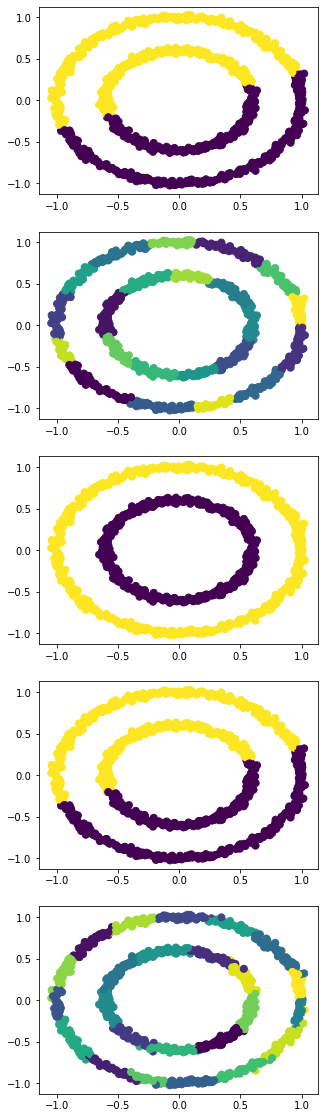

In [16]:
# K-means
kmeans = KMeans(n_clusters=2, copy_x=True, init='random')
kmeans.fit(X_circles)
y_kmeans = kmeans.predict(X_circles)

# Agglomerative Clustering
agl_clus = AgglomerativeClustering(n_clusters=None,distance_threshold=2).fit(X_circles)
y_agl_clus = agl_clus.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.2).fit(X_circles)
y_dbscan = dbscan.labels_

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=2).fit(X_circles)
y_specclus = spectral_clustering.labels_

# GMM
gmm = mixture.GaussianMixture(n_components=24)
gmm.fit(X_circles)
y_gmm= gmm.predict(X_circles)

###################
print("K-means scores")
print("bcubed precision:", precision_bcubed(y_circles, y_kmeans), "recall:", recall_bcubed(y_circles, y_kmeans), "f1 score:", f1_bcubed(y_circles, y_kmeans))
print("my silhouette score:", silhouette(X_circles, y_kmeans), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_kmeans), "\n")

print("Agglomerative Clustering scores")
print("bcubed precision:", precision_bcubed(y_circles, y_agl_clus), "recall:", recall_bcubed(y_circles, y_agl_clus), "f1 score:", f1_bcubed(y_circles, y_agl_clus))
print("my silhouette score:", silhouette(X_circles, y_agl_clus), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_agl_clus), "\n")

print("DBSCAN scores")
print("bcubed precision:", precision_bcubed(y_circles, y_dbscan), "recall:", recall_bcubed(y_circles, y_dbscan), "f1 score:", f1_bcubed(y_circles, y_dbscan))
print("my silhouette score:", silhouette(X_circles, y_dbscan), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_dbscan), "\n")

print("Spectral Clustering")
print("bcubed precision:", precision_bcubed(y_circles, y_specclus), "recall:", recall_bcubed(y_circles, y_specclus), "f1 score:", f1_bcubed(y_circles, y_specclus))
print("my silhouette score:", silhouette(X_circles, y_specclus), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_specclus), "\n")

print("GMM")
print("bcubed precision:", precision_bcubed(y_circles, y_gmm), "recall:", recall_bcubed(y_circles, y_gmm), "f1 score:", f1_bcubed(y_circles, y_gmm))
print("my silhouette score:", silhouette(X_circles, y_gmm), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_gmm))

###################
fig, axs = plt.subplots(5, 1)
fig.set_figwidth(5)
fig.set_figheight(20)

axs[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans, s=50, cmap='viridis')
axs[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_agl_clus, s=50, cmap='viridis')
axs[2].scatter(X_circles[:, 0], X_circles[:, 1], c=y_dbscan, s=50, cmap='viridis')
axs[3].scatter(X_circles[:, 0], X_circles[:, 1], c=y_specclus, s=50, cmap='viridis')
axs[4].scatter(X_circles[:, 0], X_circles[:, 1], c=y_gmm, s=50, cmap='viridis')

In [17]:
# we see that only DBSCAN gets correct clustering (correct in the non of elements of inner circle are in some cluster from smaller one)
# but it has smallest silhouette score, which is understandable based on the definition of latter

In [18]:
# hence, we see that based on type of data the scores (prec, recall and f1) could be 1's or around 1's but silhoette score might be <<1.
# better scores do not always give better separation
# for clusters that are not overlapping at all - all the scores are high <-> good clustering;
# for the case when one cluster is inside the other one or are partially overlapping 
# - high silhouette score is not good at all, it might be positive small or even negative (see the noisy moon below)
# and so on.


In [19]:
# ADDING NOISE and playing with the parameters

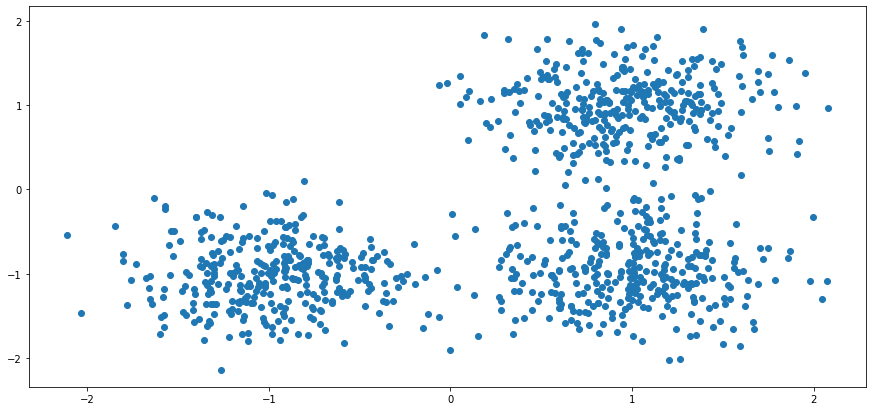

In [20]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show()

K-means scores
bcubed precision: 0.976 recall: 0.976 f1 score: 0.976
my silhouette score: 0.634 sklearn's silhouette score: 0.6342086134083013 

Agglomerative Clustering scores
bcubed precision: 0.97 recall: 0.97 f1 score: 0.97
my silhouette score: 0.632 sklearn's silhouette score: 0.6321214453251535 

DBSCAN scores
bcubed precision: 0.88 recall: 0.645 f1 score: 0.744
my silhouette score: 0.3 sklearn's silhouette score: 0.13578318415897755 

Spectral Clustering
bcubed precision: 0.976 recall: 0.976 f1 score: 0.976
my silhouette score: 0.634 sklearn's silhouette score: 0.6341570597141652 

GMM
bcubed precision: 0.976 recall: 0.976 f1 score: 0.976
my silhouette score: 0.634 sklearn's silhouette score: 0.6341570597141652


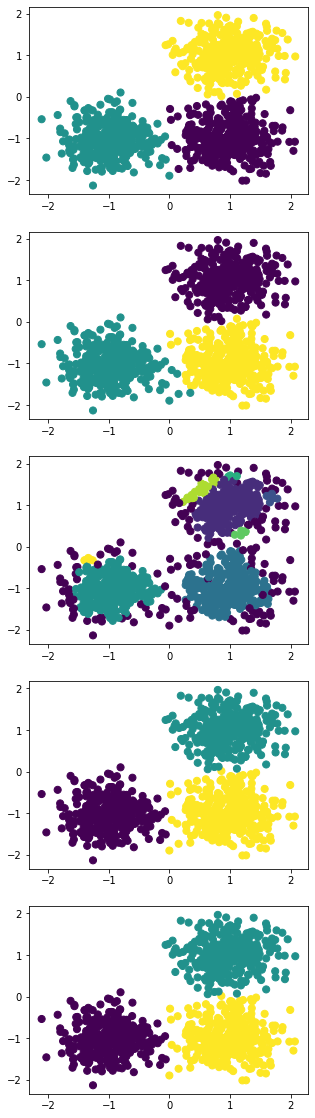

In [21]:
# K-means
kmeans = KMeans(n_clusters=3, copy_x=True, init='random')
kmeans.fit(X_blobs)
y_kmeans = kmeans.predict(X_blobs)

# Agglomerative Clustering
agl_clus = AgglomerativeClustering(n_clusters=3).fit(X_blobs)
y_agl_clus = agl_clus.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.12).fit(X_blobs)
y_dbscan = dbscan.labels_

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3).fit(X_blobs)
y_specclus = spectral_clustering.labels_

# GMM
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X_blobs)
y_gmm= gmm.predict(X_blobs)

####################
print("K-means scores")
print("bcubed precision:", precision_bcubed(y_blobs, y_kmeans), "recall:", recall_bcubed(y_blobs, y_kmeans), "f1 score:", f1_bcubed(y_blobs, y_kmeans))
print("my silhouette score:", silhouette(X_blobs, y_kmeans), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_kmeans), "\n")

print("Agglomerative Clustering scores")
print("bcubed precision:", precision_bcubed(y_blobs, y_agl_clus), "recall:", recall_bcubed(y_blobs, y_agl_clus), "f1 score:", f1_bcubed(y_blobs, y_agl_clus))
print("my silhouette score:", silhouette(X_blobs, y_agl_clus), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_agl_clus), "\n")

print("DBSCAN scores")
print("bcubed precision:", precision_bcubed(y_blobs, y_dbscan), "recall:", recall_bcubed(y_blobs, y_dbscan), "f1 score:", f1_bcubed(y_blobs, y_dbscan))
print("my silhouette score:", silhouette(X_blobs, y_dbscan), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_dbscan), "\n")

print("Spectral Clustering")
print("bcubed precision:", precision_bcubed(y_blobs, y_specclus), "recall:", recall_bcubed(y_blobs, y_specclus), "f1 score:", f1_bcubed(y_blobs, y_specclus))
print("my silhouette score:", silhouette(X_blobs, y_specclus), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_specclus), "\n")

print("GMM")
print("bcubed precision:", precision_bcubed(y_blobs, y_gmm), "recall:", recall_bcubed(y_blobs, y_gmm), "f1 score:", f1_bcubed(y_blobs, y_gmm))
print("my silhouette score:", silhouette(X_blobs, y_gmm), "sklearn's silhouette score:", metrics.silhouette_score(X_blobs, y_gmm))

####################
fig, axs = plt.subplots (5, 1)
fig.set_figwidth (5)
fig.set_figheight (20)

axs[0].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_kmeans, s = 50, cmap = 'viridis')
axs[1].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_agl_clus, s = 50, cmap = 'viridis')
axs[2].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_dbscan, s = 50, cmap = 'viridis')
axs[3].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_specclus, s = 50, cmap = 'viridis')
axs[4].scatter(X_blobs[: , 0], X_blobs[: , 1], c = y_gmm, s = 50, cmap = 'viridis')

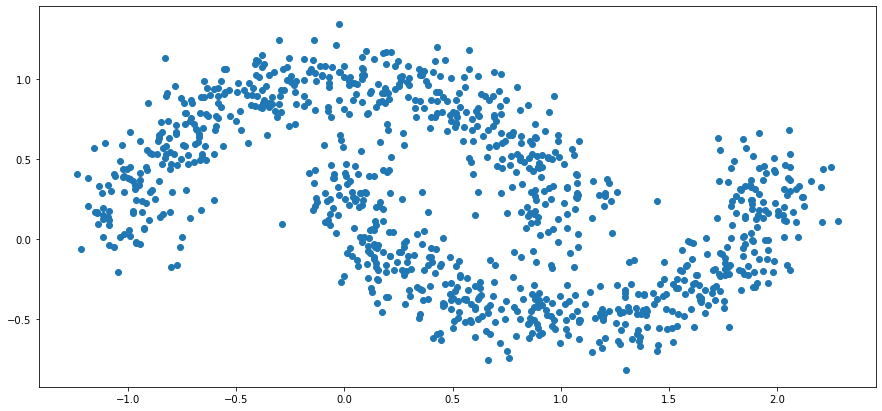

In [22]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.13, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

K-means scores
bcubed precision: 0.624 recall: 0.624 f1 score: 0.624
my silhouette score: 0.479 sklearn's silhouette score: 0.4790438211486428 

Agglomerative Clustering scores
bcubed precision: 0.98 recall: 0.133 f1 score: 0.234
my silhouette score: 0.381 sklearn's silhouette score: 0.38108046793692596 

DBSCAN scores
bcubed precision: 0.965 recall: 0.877 f1 score: 0.919
my silhouette score: -0.319 sklearn's silhouette score: -0.3277124621476305 

Spectral Clustering
bcubed precision: 0.751 recall: 0.193 f1 score: 0.307
my silhouette score: 0.246 sklearn's silhouette score: 0.24631496364099698 

GMM
bcubed precision: 0.986 recall: 0.128 f1 score: 0.227
my silhouette score: 0.404 sklearn's silhouette score: 0.404247074501539


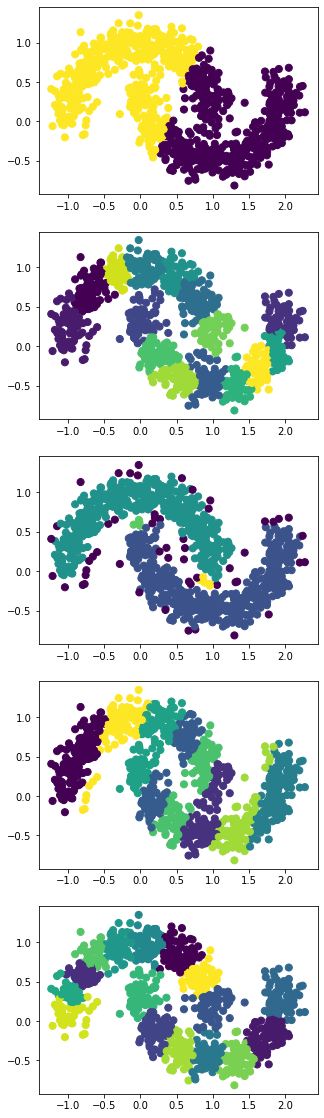

In [23]:
# K-means
kmeans = KMeans(n_clusters=2, copy_x=True, init='random')
kmeans.fit(X_moons)
y_kmeans = kmeans.predict(X_moons)

# Agglomerative Clustering
agl_clus = AgglomerativeClustering(n_clusters=None,distance_threshold=2).fit(X_moons)
y_agl_clus = agl_clus.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.1 ).fit(X_moons)
y_dbscan = dbscan.labels_

# Spectral Clustering
spectral_clustering = SpectralClustering(n_components=2).fit(X_moons)
y_specclus = spectral_clustering.labels_

# GMM
gmm = mixture.GaussianMixture(n_components=16)
gmm.fit(X_moons)
y_gmm= gmm.predict(X_moons)

#####################
print("K-means scores")
print("bcubed precision:", precision_bcubed(y_moons, y_kmeans), "recall:", recall_bcubed(y_moons, y_kmeans), "f1 score:", f1_bcubed(y_moons, y_kmeans))
print("my silhouette score:", silhouette(X_moons, y_kmeans), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_kmeans), "\n")

print("Agglomerative Clustering scores")
print("bcubed precision:", precision_bcubed(y_moons, y_agl_clus), "recall:", recall_bcubed(y_moons, y_agl_clus), "f1 score:", f1_bcubed(y_moons, y_agl_clus))
print("my silhouette score:", silhouette(X_moons, y_agl_clus), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_agl_clus), "\n")

print("DBSCAN scores")
print("bcubed precision:", precision_bcubed(y_moons, y_dbscan), "recall:", recall_bcubed(y_moons, y_dbscan), "f1 score:", f1_bcubed(y_moons, y_dbscan))
print("my silhouette score:", silhouette(X_moons, y_dbscan), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_dbscan), "\n")

print("Spectral Clustering")
print("bcubed precision:", precision_bcubed(y_moons, y_specclus), "recall:", recall_bcubed(y_moons, y_specclus), "f1 score:", f1_bcubed(y_moons, y_specclus))
print("my silhouette score:", silhouette(X_moons, y_specclus), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_specclus), "\n")

print("GMM")
print("bcubed precision:", precision_bcubed(y_moons, y_gmm), "recall:", recall_bcubed(y_moons, y_gmm), "f1 score:", f1_bcubed(y_moons, y_gmm))
print("my silhouette score:", silhouette(X_moons, y_gmm), "sklearn's silhouette score:", metrics.silhouette_score(X_moons, y_gmm))


############
fig, axs = plt.subplots (5, 1)
fig.set_figwidth (5)
fig.set_figheight (20)

axs[0].scatter(X_moons[:, 0], X_moons[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c = y_agl_clus, s = 50, cmap = 'viridis')
axs[2].scatter(X_moons[:, 0], X_moons[:, 1], c = y_dbscan, s = 50, cmap = 'viridis')
axs[3].scatter(X_moons[:, 0], X_moons[:, 1], c = y_specclus, s = 50, cmap = 'viridis')
axs[4].scatter(X_moons[:, 0], X_moons[:, 1], c = y_gmm, s = 50, cmap = 'viridis')

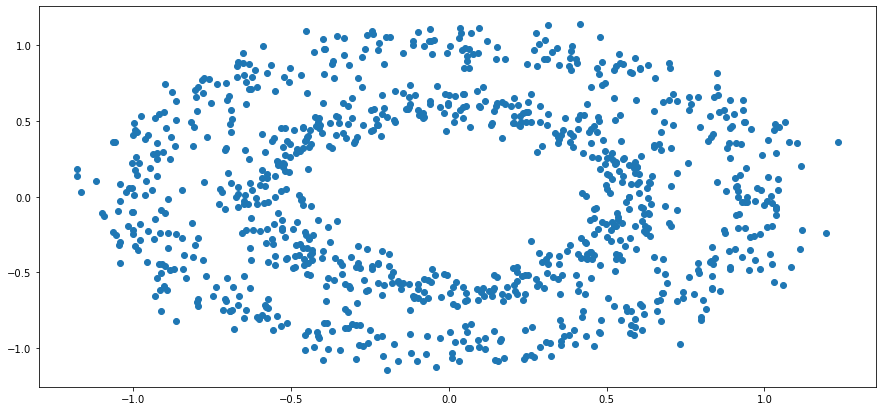

In [24]:
X_circles, y_circles = make_circles(n_samples=1000, noise=0.08, factor=0.6, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_circles[:,0], X_circles[:,1])
plt.show()

K-means scores
bcubed precision: 0.499 recall: 0.499 f1 score: 0.499
my silhouette score: 0.372 sklearn's silhouette score: 0.3715538969127943 

Agglomerative Clustering scores
bcubed precision: 0.977 recall: 0.104 f1 score: 0.188
my silhouette score: 0.407 sklearn's silhouette score: 0.40686573536253523 

DBSCAN scores
bcubed precision: 0.821 recall: 0.287 f1 score: 0.425
my silhouette score: 0.403 sklearn's silhouette score: -0.18874499898223926 

Spectral Clustering
bcubed precision: 0.499 recall: 0.499 f1 score: 0.499
my silhouette score: 0.368 sklearn's silhouette score: 0.3684307496428652 

GMM
bcubed precision: 0.984 recall: 0.085 f1 score: 0.156
my silhouette score: 0.393 sklearn's silhouette score: 0.3933154004273139


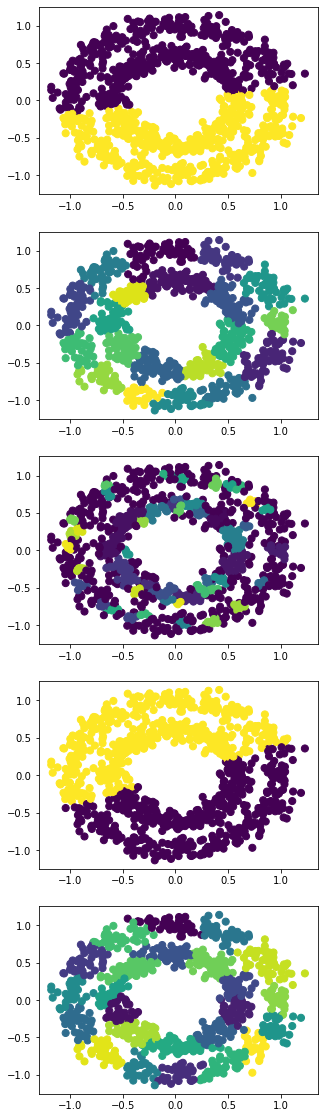

In [25]:
# K-means
kmeans = KMeans(n_clusters=2, copy_x=True, init='random')
kmeans.fit(X_circles)
y_kmeans = kmeans.predict(X_circles)

# Agglomerative Clustering
agl_clus = AgglomerativeClustering(n_clusters=None,distance_threshold=2).fit(X_circles)
y_agl_clus = agl_clus.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.05).fit(X_circles)
y_dbscan = dbscan.labels_

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=2).fit(X_circles)
y_specclus = spectral_clustering.labels_

# GMM
gmm = mixture.GaussianMixture(n_components=24)
gmm.fit(X_circles)
y_gmm= gmm.predict(X_circles)

###################
print("K-means scores")
print("bcubed precision:", precision_bcubed(y_circles, y_kmeans), "recall:", recall_bcubed(y_circles, y_kmeans), "f1 score:", f1_bcubed(y_circles, y_kmeans))
print("my silhouette score:", silhouette(X_circles, y_kmeans), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_kmeans), "\n")

print("Agglomerative Clustering scores")
print("bcubed precision:", precision_bcubed(y_circles, y_agl_clus), "recall:", recall_bcubed(y_circles, y_agl_clus), "f1 score:", f1_bcubed(y_circles, y_agl_clus))
print("my silhouette score:", silhouette(X_circles, y_agl_clus), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_agl_clus), "\n")

print("DBSCAN scores")
print("bcubed precision:", precision_bcubed(y_circles, y_dbscan), "recall:", recall_bcubed(y_circles, y_dbscan), "f1 score:", f1_bcubed(y_circles, y_dbscan))
print("my silhouette score:", silhouette(X_circles, y_dbscan), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_dbscan), "\n")

print("Spectral Clustering")
print("bcubed precision:", precision_bcubed(y_circles, y_specclus), "recall:", recall_bcubed(y_circles, y_specclus), "f1 score:", f1_bcubed(y_circles, y_specclus))
print("my silhouette score:", silhouette(X_circles, y_specclus), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_specclus), "\n")

print("GMM")
print("bcubed precision:", precision_bcubed(y_circles, y_gmm), "recall:", recall_bcubed(y_circles, y_gmm), "f1 score:", f1_bcubed(y_circles, y_gmm))
print("my silhouette score:", silhouette(X_circles, y_gmm), "sklearn's silhouette score:", metrics.silhouette_score(X_circles, y_gmm))

###################
fig, axs = plt.subplots(5, 1)
fig.set_figwidth(5)
fig.set_figheight(20)

axs[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans, s=50, cmap='viridis')
axs[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_agl_clus, s=50, cmap='viridis')
axs[2].scatter(X_circles[:, 0], X_circles[:, 1], c=y_dbscan, s=50, cmap='viridis')
axs[3].scatter(X_circles[:, 0], X_circles[:, 1], c=y_specclus, s=50, cmap='viridis')
axs[4].scatter(X_circles[:, 0], X_circles[:, 1], c=y_gmm, s=50, cmap='viridis')